## 建两个相同图

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
import csv

# 读取 CSV 文件并创建有向图对象
G = nx.MultiDiGraph()

# 从 CSV 文件中添加节点和边
with open(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\merged_data_with_time.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['at_mid']:
            at_mid_list = row['at_mid'].split(' ')
            weight0 = float(row['like'])+1.0 if row['like'] else 1.0
            for at_mid in at_mid_list:
                G.add_edge(row['mid'], at_mid, weight=weight0)
# 绘制图（可选）
# nx.draw_networkx(G, with_labels=False, node_size=10, node_color='b', alpha=0.6, edge_color='r') 
# plt.show()



# 如果要查看多重边的情况，可以使用如下方法
# for edge in G.edges(data=True):
#     print(edge)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
import csv

# 读取 CSV 文件并创建有向图对象
G0 = nx.MultiDiGraph()

# 从 CSV 文件中添加节点和边
with open(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\merged_data_with_time_all.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row['at_mid']:
            at_mid_list = row['at_mid'].split(' ')
            weight0 = float(row['like'])+1.0 if row['like'] else 1.0
            for at_mid in at_mid_list:
                G0.add_edge(row['mid'], at_mid, weight=weight0)
# 绘制图（可选）
# nx.draw_networkx(G, with_labels=False, node_size=10, node_color='b', alpha=0.6, edge_color='r') 
# plt.show()



# 如果要查看多重边的情况，可以使用如下方法
# for edge in G.edges(data=True):
#     print(edge)

## 画图

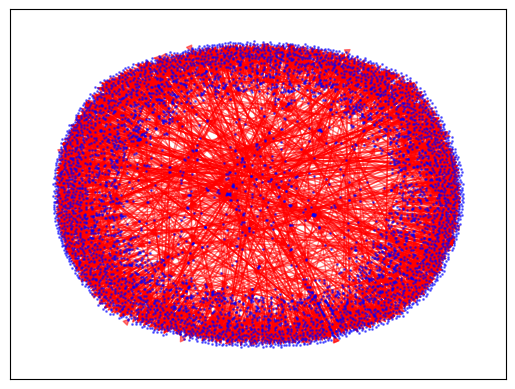

In [ ]:
# 绘制图（可选）
nx.draw_networkx(G, with_labels=False, node_size=1, node_color='b', alpha=0.5, edge_color='r') 
plt.show()

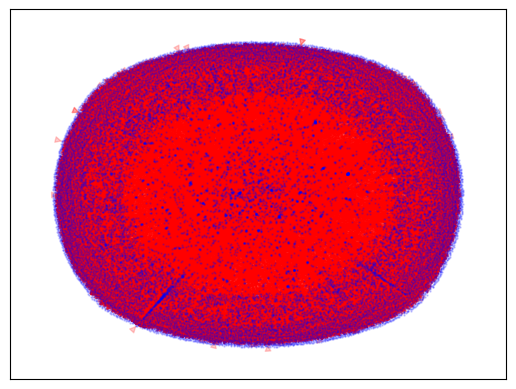

In [ ]:
# 绘制图（可选）
nx.draw_networkx(G0, with_labels=False, node_size=0.5, node_color='b', alpha=0.2, edge_color='r') 
plt.show()

### 删除度为1的节点

In [ ]:
import networkx as nx


# 找出所有度为1的节点
nodes_with_degree_one = [node for node, degree in dict(G0.degree()).items() if degree == 1]

# 删除这些节点
G0.remove_nodes_from(nodes_with_degree_one)


In [ ]:
# 输出图的一些信息（可选）
print("Number of nodes:", G0.number_of_nodes())
print("Number of edges:", G0.number_of_edges())
# 计算图的稀疏性
sparsity = nx.density(G0)
print("Sparsity of the graph:", sparsity)

Number of nodes: 13601
Number of edges: 22631
Sparsity of the graph: 0.00012234718900426872


### 加入更多实体，例如视频、一级评论等

In [ ]:
import csv

dict0 = {}
with open(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\merged_data_with_time_all.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        dict0[row['rpid']] = row['mid']

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt 
import csv

# 读取 CSV 文件并创建有向图对象
G1 = nx.MultiDiGraph()
i=0
j=0
# 从 CSV 文件中添加节点和边
with open(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\merged_data_with_time_all.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        weight0 = float(row['like'])+1.0 if row['like'] else 1.0
        time0 = row['ctime']
        if row['root']== 0 or row['root']== "0":
            G1.add_edge(row['mid'], row['oid'], weight=weight0, time=time0)
        else:
            try:
                G1.add_edge(row['mid'], dict0[row['root']], weight=weight0, time=time0)
                i+=1
            except:
                j+=1
                pass
        if row['at_mid']:
            at_mid_list = row['at_mid'].split(' ')
            for at_mid in at_mid_list:
                G1.add_edge(row['mid'], at_mid, weight=weight0, time=time0)
# 绘制图（可选）
# nx.draw_networkx(G, with_labels=False, node_size=10, node_color='b', alpha=0.6, edge_color='r') 
# plt.show()



# 如果要查看多重边的情况，可以使用如下方法
# for edge in G.edges(data=True):
#     print(edge)


### 计算稀疏性

In [ ]:
# 输出图的一些信息（可选）
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
# 计算图的稀疏性
sparsity = nx.density(G)
print("Sparsity of the graph:", sparsity)

Number of nodes: 5351
Number of edges: 4496
Sparsity of the graph: 0.00015704986577755577


In [ ]:
# 输出图的一些信息（可选）
print("Number of nodes:", G0.number_of_nodes())
print("Number of edges:", G0.number_of_edges())
# 计算图的稀疏性
sparsity = nx.density(G0)
print("Sparsity of the graph:", sparsity)

Number of nodes: 26475
Number of edges: 32203
Sparsity of the graph: 4.594526901623436e-05


In [ ]:
# 输出图的一些信息（可选）
print("Number of nodes:", G1.number_of_nodes())
print("Number of edges:", G1.number_of_edges())
# 计算图的稀疏性
sparsity = nx.density(G1)
print("Sparsity of the graph:", sparsity)

Number of nodes: 139703
Number of edges: 348656
Sparsity of the graph: 1.7864414521518924e-05


### 聚类系数和中心性

In [ ]:
def in_degree_clustering_coefficient(graph):
    total_in_cc = 0
    for node in graph.nodes:
        in_neighbors = set(graph.predecessors(node))  # 获取节点的入度邻居集合
        total_possible_in_edges = len(in_neighbors) * (len(in_neighbors) - 1) / 2
        if total_possible_in_edges > 0:
            total_actual_in_edges = sum(1 for u, v in graph.in_edges(node) if v in in_neighbors)
            in_cc_i = total_actual_in_edges / total_possible_in_edges
            total_in_cc += in_cc_i

    return total_in_cc / len(graph.nodes)


def out_degree_clustering_coefficient(graph):
    total_out_cc = 0
    for node in graph.nodes:
        out_neighbors = set(graph.successors(node))  # 获取节点的出度邻居集合
        total_possible_out_edges = len(out_neighbors) * (len(out_neighbors) - 1) / 2
        if total_possible_out_edges > 0:
            total_actual_out_edges = sum(1 for u, v in graph.out_edges(node) if v in out_neighbors)
            out_cc_i = total_actual_out_edges / total_possible_out_edges
            total_out_cc += out_cc_i

    return total_out_cc / len(graph.nodes)

# 计算图的平均入度聚类系数
avg_in_cc = in_degree_clustering_coefficient(G)
print("Average in-degree clustering coefficient:", avg_in_cc)
# 计算图的平均出度聚类系数
avg_out_cc = out_degree_clustering_coefficient(G)
print("Average out-degree clustering coefficient:", avg_out_cc)

Average in-degree clustering coefficient: 0.0
Average out-degree clustering coefficient: 0.15046500873449112


In [ ]:
# 计算图的平均入度聚类系数
avg_in_cc = in_degree_clustering_coefficient(G0)
print("Average in-degree clustering coefficient:", avg_in_cc)
# 计算图的平均出度聚类系数
avg_out_cc = out_degree_clustering_coefficient(G0)
print("Average out-degree clustering coefficient:", avg_out_cc)

Average in-degree clustering coefficient: 0.0
Average out-degree clustering coefficient: 0.2501784953117732


### 中心度

In [ ]:
# 度中心度，度中心度是指节点的度（即节点的连接数）与总节点数的比例。度中心度越高，表示节点在网络中连接的越多。
# 计算节点的度中心度
import networkx as nx

def degree_centrality(graph):
    return nx.degree_centrality(graph)

# 计算节点的度中心度
dc = degree_centrality(G)
dc

{'44072630': 0.00018691588785046728,
 '628341353': 0.00037383177570093456,
 '28734388': 0.00018691588785046728,
 '1254336440': 0.00037383177570093456,
 '67749555': 0.00018691588785046728,
 '298484651': 0.00018691588785046728,
 '328525024': 0.00037383177570093456,
 '488102396': 0.00018691588785046728,
 '41995368': 0.0007476635514018691,
 '3546612622166364': 0.0007476635514018691,
 '351460456': 0.00018691588785046728,
 '1126618090': 0.00018691588785046728,
 '89448794': 0.00037383177570093456,
 '140552545': 0.00018691588785046728,
 '1804938265': 0.00018691588785046728,
 '49877911': 0.00018691588785046728,
 '177557513': 0.00018691588785046728,
 '550674844': 0.0014953271028037382,
 '513086850': 0.00037383177570093456,
 '85070794': 0.00018691588785046728,
 '2108856': 0.00018691588785046728,
 '145957048': 0.0005607476635514019,
 '6501780': 0.00018691588785046728,
 '2025128828': 0.00018691588785046728,
 '411143820': 0.00018691588785046728,
 '106162070': 0.00018691588785046728,
 '1596542': 0.00

In [ ]:
# 度中心度，度中心度是指节点的度（即节点的连接数）与总节点数的比例。度中心度越高，表示节点在网络中连接的越多。
# 计算节点的度中心度
import networkx as nx

def degree_centrality(graph):
    return nx.degree_centrality(graph)

# 计算节点的度中心度
dc = degree_centrality(G0)
dc

{'44072630': 3.7772909269471935e-05,
 '628341353': 0.0002266374556168316,
 '28734388': 3.7772909269471935e-05,
 '1254336440': 7.554581853894387e-05,
 '67749555': 3.7772909269471935e-05,
 '298484651': 0.0006421394575810229,
 '328525024': 7.554581853894387e-05,
 '488102396': 3.7772909269471935e-05,
 '41995368': 0.00015109163707788774,
 '3546612622166364': 0.00015109163707788774,
 '351460456': 3.7772909269471935e-05,
 '1126618090': 3.7772909269471935e-05,
 '89448794': 7.554581853894387e-05,
 '140552545': 3.7772909269471935e-05,
 '1804938265': 3.7772909269471935e-05,
 '49877911': 3.7772909269471935e-05,
 '177557513': 0.00026441036488630354,
 '550674844': 0.008649996222709073,
 '513086850': 7.554581853894387e-05,
 '85070794': 3.7772909269471935e-05,
 '2108856': 3.7772909269471935e-05,
 '145957048': 0.0001133187278084158,
 '6501780': 3.7772909269471935e-05,
 '2025128828': 3.7772909269471935e-05,
 '411143820': 0.0001133187278084158,
 '106162070': 3.7772909269471935e-05,
 '1596542': 3.77729092

In [ ]:
# 介数中心度，介数中心度是指节点在网络中作为桥梁的程度。介数中心度越高，表示节点在网络中连接不同的部分。
# 计算节点的介数中心度
def betweenness_centrality(graph):
    return nx.betweenness_centrality(graph)

# 计算节点的介数中心度
bc = betweenness_centrality(G)
bc

{'44072630': 0.0,
 '628341353': 0.0,
 '28734388': 0.0,
 '1254336440': 0.0,
 '67749555': 0.0,
 '298484651': 0.0,
 '328525024': 0.0,
 '488102396': 0.0,
 '41995368': 3.144967266132372e-07,
 '3546612622166364': 1.7472040367402064e-07,
 '351460456': 0.0,
 '1126618090': 0.0,
 '89448794': 0.0,
 '140552545': 0.0,
 '1804938265': 0.0,
 '49877911': 0.0,
 '177557513': 0.0,
 '550674844': 0.0,
 '513086850': 0.0,
 '85070794': 0.0,
 '2108856': 0.0,
 '145957048': 1.3977632293921652e-07,
 '6501780': 0.0,
 '2025128828': 0.0,
 '411143820': 0.0,
 '106162070': 0.0,
 '1596542': 0.0,
 '516302993': 0.0,
 '621799712': 0.0,
 '1630172271': 3.144967266132372e-07,
 '43208365': 0.0,
 '298591335': 3.494408073480413e-08,
 '74225438': 1.3977632293921652e-07,
 '327045214': 0.0,
 '182818992': 0.0,
 '3493119293130927': 0.0,
 '291873233': 0.0,
 '215848317': 0.0,
 '108618052': 0.0,
 '2493523': 0.0,
 '396878608': 0.0,
 '81397207': 3.494408073480413e-08,
 '671237091': 0.0,
 '1668652239': 0.0,
 '31098387': 0.0,
 '104371066': 0

In [ ]:
# 介数中心度，介数中心度是指节点在网络中作为桥梁的程度。介数中心度越高，表示节点在网络中连接不同的部分。
# 计算节点的介数中心度
def betweenness_centrality(graph):
    return nx.betweenness_centrality(graph)

# 计算节点的介数中心度
bc = betweenness_centrality(G0)
bc

{'44072630': 0.0,
 '628341353': 0.0,
 '28734388': 0.0,
 '1254336440': 0.0,
 '67749555': 0.0,
 '298484651': 2.3828337732791193e-06,
 '328525024': 0.0,
 '488102396': 0.0,
 '41995368': 1.569531227908402e-08,
 '3546612622166364': 8.56107942495492e-09,
 '351460456': 0.0,
 '1126618090': 0.0,
 '89448794': 0.0,
 '140552545': 0.0,
 '1804938265': 0.0,
 '49877911': 0.0,
 '177557513': 0.0,
 '550674844': 0.0,
 '513086850': 0.0,
 '85070794': 0.0,
 '2108856': 0.0,
 '145957048': 5.70738628330328e-09,
 '6501780': 0.0,
 '2025128828': 0.0,
 '411143820': 0.0,
 '106162070': 0.0,
 '1596542': 0.0,
 '516302993': 0.0,
 '621799712': 0.0,
 '1630172271': 1.712215884990984e-08,
 '43208365': 0.0,
 '298591335': 1.42684657082582e-09,
 '74225438': 3.3102840443159023e-07,
 '327045214': 0.0,
 '182818992': 0.0,
 '3493119293130927': 0.0,
 '291873233': 0.0,
 '215848317': 0.0,
 '108618052': 0.0,
 '2493523': 0.0,
 '396878608': 0.0,
 '81397207': 1.42684657082582e-09,
 '671237091': 0.0,
 '1668652239': 0.0,
 '31098387': 0.0,
 '

In [ ]:
# 接近度中心度，接近度中心度是指节点与其他节点的平均距离的倒数。接近度中心度越高，表示节点在网络中连接的越紧密。接近度中心度高的节点通常能够更快地访问到网络中的其他节点。
# 计算节点的接近度中心度
def closeness_centrality(graph):
    return nx.closeness_centrality(graph)

# 计算节点的接近度中心度
cc = closeness_centrality(G)
cc

{'44072630': 0.0,
 '628341353': 0.00037383177570093456,
 '28734388': 0.0,
 '1254336440': 0.00037383177570093456,
 '67749555': 0.0,
 '298484651': 0.00018691588785046728,
 '328525024': 0.0,
 '488102396': 0.00018691588785046728,
 '41995368': 0.0004205607476635514,
 '3546612622166364': 0.0004205607476635514,
 '351460456': 0.0,
 '1126618090': 0.00018691588785046728,
 '89448794': 0.0,
 '140552545': 0.00018691588785046728,
 '1804938265': 0.0,
 '49877911': 0.00018691588785046728,
 '177557513': 0.0,
 '550674844': 0.0014953271028037382,
 '513086850': 0.0,
 '85070794': 0.00018691588785046728,
 '2108856': 0.00018691588785046728,
 '145957048': 0.0004984423676012461,
 '6501780': 0.0004248088360237893,
 '2025128828': 0.0,
 '411143820': 0.00018691588785046728,
 '106162070': 0.0,
 '1596542': 0.00018691588785046728,
 '516302993': 0.0,
 '621799712': 0.00018691588785046728,
 '1630172271': 0.00028037383177570094,
 '43208365': 0.0,
 '298591335': 0.00037383177570093456,
 '74225438': 0.00037383177570093456,
 

In [ ]:
# 接近度中心度，接近度中心度是指节点与其他节点的平均距离的倒数。接近度中心度越高，表示节点在网络中连接的越紧密。接近度中心度高的节点通常能够更快地访问到网络中的其他节点。
# 计算节点的接近度中心度
def closeness_centrality(graph):
    return nx.closeness_centrality(graph)

# 计算节点的接近度中心度
cc = closeness_centrality(G0)
cc

{'44072630': 0.0,
 '628341353': 0.00015109163707788774,
 '28734388': 0.0,
 '1254336440': 7.554581853894387e-05,
 '67749555': 0.0,
 '298484651': 0.0020881296421974317,
 '328525024': 0.0,
 '488102396': 3.7772909269471935e-05,
 '41995368': 8.498904585631185e-05,
 '3546612622166364': 8.498904585631185e-05,
 '351460456': 0.0,
 '1126618090': 3.7772909269471935e-05,
 '89448794': 0.0,
 '140552545': 3.7772909269471935e-05,
 '1804938265': 0.0,
 '49877911': 3.7772909269471935e-05,
 '177557513': 0.0,
 '550674844': 0.0036755156123865194,
 '513086850': 0.0,
 '85070794': 3.7772909269471935e-05,
 '2108856': 3.7772909269471935e-05,
 '145957048': 0.00010072775805192516,
 '6501780': 8.584752106698167e-05,
 '2025128828': 0.0,
 '411143820': 0.0001133187278084158,
 '106162070': 0.0,
 '1596542': 3.7772909269471935e-05,
 '516302993': 0.0,
 '621799712': 3.7772909269471935e-05,
 '1630172271': 5.66593639042079e-05,
 '43208365': 0.0,
 '298591335': 7.554581853894387e-05,
 '74225438': 0.0003970877086953237,
 '32704

### 探索图形的连通性，检查是否存在子图

In [ ]:
import networkx as nx


# 检查图是否是强连通的
is_strongly_connected = nx.is_strongly_connected(G)
print("Is the graph strongly connected?", is_strongly_connected)

# 检查图是否是弱连通的
is_weakly_connected = nx.is_weakly_connected(G)
print("Is the graph weakly connected?", is_weakly_connected)

# 查找图的强连通分量
strongly_connected_components = list(nx.strongly_connected_components(G))
print("Strongly connected components:", strongly_connected_components)

# 查找图的弱连通分量
weakly_connected_components = list(nx.weakly_connected_components(G))
print("Weakly connected components:", weakly_connected_components)

# 检查是否存在子图
has_subgraph = any(len(component) > 1 for component in weakly_connected_components)
print("Does the graph have a subgraph?", has_subgraph)


Is the graph strongly connected? False
Is the graph weakly connected? False
Strongly connected components: [{'628341353'}, {'44072630'}, {'1254336440'}, {'28734388'}, {'298484651'}, {'67749555'}, {'488102396'}, {'140552545'}, {'328525024'}, {'355764992'}, {'230199947'}, {'693596756'}, {'41995368', '3546612622166364', '1630172271'}, {'1126618090'}, {'351460456'}, {'89448794'}, {'49877911'}, {'1804938265'}, {'550674844'}, {'177557513'}, {'85070794'}, {'2108856'}, {'513086850'}, {'6501780'}, {'145957048'}, {'411143820'}, {'2025128828'}, {'1596542'}, {'106162070'}, {'621799712'}, {'516302993'}, {'298591335', '336685438'}, {'43208365'}, {'327045214'}, {'33314855'}, {'175866577'}, {'3493110680128373'}, {'9250854'}, {'3537125236542223'}, {'389675998'}, {'35044514'}, {'79279873'}, {'13097693'}, {'5729301.0'}, {'2610742.0'}, {'397690088.0'}, {'628280609', '74225438', '295276122'}, {'182818992', '3493119293130927'}, {'215848317'}, {'108618052'}, {'291873233'}, {'396878608'}, {'2493523'}, {'67123

In [ ]:
import networkx as nx


# 检查图是否是强连通的
is_strongly_connected = nx.is_strongly_connected(G0)
print("Is the graph strongly connected?", is_strongly_connected)

# 检查图是否是弱连通的
is_weakly_connected = nx.is_weakly_connected(G0)
print("Is the graph weakly connected?", is_weakly_connected)

# 查找图的强连通分量
strongly_connected_components = list(nx.strongly_connected_components(G0))
print("Strongly connected components:", strongly_connected_components)

# 查找图的弱连通分量
weakly_connected_components = list(nx.weakly_connected_components(G0))
print("Weakly connected components:", weakly_connected_components)

# 检查是否存在子图
has_subgraph = any(len(component) > 1 for component in weakly_connected_components)
print("Does the graph have a subgraph?", has_subgraph)


Is the graph strongly connected? False
Is the graph weakly connected? False
Strongly connected components: [{'628341353'}, {'44072630'}, {'1254336440'}, {'28734388'}, {'33771766.0'}, {'432522397.0'}, {'32355669.0'}, {'353415901'}, {'215959543'}, {'10443539'}, {'435129681', '298484651', '455401684'}, {'67749555'}, {'488102396'}, {'140552545'}, {'328525024'}, {'3494353320282962.0'}, {'355764992'}, {'230199947'}, {'693596756'}, {'3546612622166364', '41995368', '1630172271'}, {'1126618090'}, {'351460456'}, {'89448794'}, {'49877911'}, {'1804938265'}, {'550674844'}, {'487614876'}, {'550674844.0'}, {'177557513'}, {'85070794'}, {'2108856'}, {'513086850'}, {'6501780'}, {'145957048'}, {'411143820'}, {'2025128828'}, {'1596542'}, {'106162070'}, {'621799712'}, {'516302993'}, {'336685438', '298591335'}, {'430287242'}, {'43208365'}, {'327045214'}, {'355291104'}, {'1919681210'}, {'1072499832'}, {'355597265'}, {'3546582668544955', '401920601'}, {'1070169182'}, {'1145412108'}, {'1308802183'}, {'44857847

### 使用社区检测算法（如Louvain算法或谱聚类）识别图形中的社区结构

In [ ]:
# Louvain 算法是一种基于贪心策略的快速社区检测算法，它旨在最大化图的模块度（modularity）。
import community.community_louvain as community

# 使用Louvain算法识别社区
partition = community.best_partition(G.to_undirected())  # 将有向图转换为无向图进行社区检测
print("Louvain algorithm result:")
print(partition)


Louvain algorithm result:
{'44072630': 0, '628341353': 0, '28734388': 1, '1254336440': 1, '67749555': 2, '298484651': 2, '328525024': 3, '488102396': 3, '41995368': 4, '3546612622166364': 4, '351460456': 5, '1126618090': 5, '89448794': 4, '140552545': 3, '1804938265': 6, '49877911': 6, '177557513': 7, '550674844': 7, '513086850': 8, '85070794': 8, '2108856': 8, '145957048': 9, '6501780': 9, '2025128828': 10, '411143820': 10, '106162070': 11, '1596542': 11, '516302993': 12, '621799712': 12, '1630172271': 4, '43208365': 13, '298591335': 13, '74225438': 7, '327045214': 7, '182818992': 14, '3493119293130927': 14, '291873233': 0, '215848317': 0, '108618052': 0, '2493523': 15, '396878608': 15, '81397207': 16, '671237091': 16, '1668652239': 16, '31098387': 17, '104371066': 17, '325960899': 18, '1001884030': 18, '2683654': 19, '814165': 19, '8214868': 20, '511253696': 20, '32932464': 21, '3493093531715992': 21, '1619813376': 22, '8455326': 22, '336685438': 13, '23843555': 23, '2709727': 23, '3

In [ ]:
# Louvain 算法是一种基于贪心策略的快速社区检测算法，它旨在最大化图的模块度（modularity）。
import community.community_louvain as community

# 使用Louvain算法识别社区
partition = community.best_partition(G0.to_undirected())  # 将有向图转换为无向图进行社区检测
print("Louvain algorithm result:")
print(partition)

Louvain algorithm result:
{'44072630': 0, '628341353': 0, '28734388': 1, '1254336440': 1, '67749555': 2, '298484651': 2, '328525024': 3, '488102396': 3, '41995368': 4, '3546612622166364': 4, '351460456': 5, '1126618090': 5, '89448794': 4, '140552545': 3, '1804938265': 6, '49877911': 6, '177557513': 7, '550674844': 7, '513086850': 8, '85070794': 8, '2108856': 8, '145957048': 9, '6501780': 9, '2025128828': 10, '411143820': 10, '106162070': 11, '1596542': 11, '516302993': 12, '621799712': 12, '1630172271': 4, '43208365': 13, '298591335': 13, '74225438': 14, '327045214': 14, '182818992': 15, '3493119293130927': 15, '291873233': 16, '215848317': 16, '108618052': 0, '2493523': 17, '396878608': 17, '81397207': 18, '671237091': 18, '1668652239': 18, '31098387': 19, '104371066': 19, '325960899': 20, '1001884030': 20, '2683654': 21, '814165': 21, '8214868': 22, '511253696': 22, '32932464': 23, '3493093531715992': 23, '1619813376': 24, '8455326': 24, '336685438': 13, '23843555': 25, '2709727': 25

## 构建网络（此方法弃用，用匹配'回复 @(\w+) :'方式构建网络）

In [ ]:
import pandas as pd
import re

# 读取CSV文件
df = pd.read_csv(r"C:\Users\WYJ20\OneDrive\桌面\毕业论文\bilibili_data\bilibili_data\data\results\merged_data.csv")
network_data = pd.DataFrame()

# 选择特定列
content = df[['content', 'like', 'rcount', 'uname','sex', 'mid','oid' ,'diag']]

# 遍历每一行数据
for index, row in content.iterrows():
    # print(row['content'])
    # 在每一行的评论内容中查找匹配
    matches = re.findall(r'回复 @(\w+) :', row['content'])
    if matches != []:
        # 如果匹配成功，将匹配结果存储到network_data中
        for match in matches:
            match = str(match).strip()
            if match in content['uname']:
                to_mid = df.loc[df['uname'] == match, 'mid'].iloc[0]
                network_data = network_data.append({'from_uname': row['uname'],'from_mid':row['mid'], 'to_uname': match, 'to_mid': to_mid })
network_data.head()

嶱肸鸔瀨峎蟘
wbgtheahyreal
还说书吗
洞里的熋
种花家的ZTZ
江本行界
谢里夫v
积极向上乐观阳光
寞汁
彼夜
西北行道树
萌新丶梦魂
萌新丶梦魂
清醒一整天啊
禁止建模
熏香樱花刀
熏香樱花刀
高健的命鬼
彩虹素描kke
我有抑郁症别骂我Oo
屑小将
蛮不讲理的托比
樱梅慧子
叫我拾一就好了
okuyi_苏雪
okuyi_苏雪
南冥銀依
为惠改昵称
首冲仙人
伯雅柠
伯雅柠
在下预言君
灿如晨曦
山顶上的观鸟者
电光超人ffu
尾上世莉架serika
赤壁水煮肉片
二娃威武
二娃威武
bili_1592229811
吃小龙虾的小龙虾
webdog
这里是夹头大本营
夷羿伐之
冰歌想dn的m
猫头大队
月贝凡2号
JoshuaLeo
酷酷克
驽马4S
无奈琥珀
一只猫猫头鹰
水飞就换头
祈天之愿
祈天之愿
请输入_____昵称
叮当响的叮当猫
道爷我成啦哈哈哈
Condor01
游客有账号了
Condor01
Es_Q_
我有抑郁症别骂我Oo
先辈sukisu
二十三煜
二十三煜
种子埋在云下面
红叶天妇罗
结绳丶前世
只是_朱颜改
zeronwo
zeronwo
肖何official
lzMeguyu
即为完美容器
骡子拿出来溜
炼气期小辈
炼气期小辈
佛罗里达融巧人
梅西东一郎
master星疯
混子色天使
76号行政处处长
ALoneTrail_
ALoneTrail_
黑白猫小哈
嶱肸鸔瀨峎蟘
wbgtheahyreal
还说书吗
洞里的熋
谢里夫v
种花家的ZTZ
江本行界
清醒一整天啊
禁止建模
熏香樱花刀
熏香樱花刀
高健的命鬼
彩虹素描kke
我有抑郁症别骂我Oo
屑小将
蛮不讲理的托比
樱梅慧子
叫我拾一就好了
叫我拾一就好了
okuyi_苏雪
okuyi_苏雪
为惠改昵称
首冲仙人
南冥銀依
在下预言君
灿如晨曦
伯雅柠
伯雅柠
山顶上的观鸟者
电光超人ffu
尾上世莉架serika
吃小龙虾的小龙虾
赤壁水煮肉片
二娃威武
二娃威武
bili_1592229811
夷羿伐之
webdog
这里是夹头大本营
冰歌想dn的m
猫头大队
月贝凡2号
JoshuaLeo
酷酷克
驽马4S
无奈琥珀
先辈sukisu
一只猫猫头鹰
水飞就换头
阳光黑无常
祈天之愿
祈天之愿
请输入_____昵称
叮当响的叮当猫
道爷我成啦哈哈哈
Es_Q

""


In [ ]:
import pandas as pd
import re

# 读取CSV文件
df = pd.read_csv(r"C:\Users\WYJ20\OneDrive\桌面\毕业论文\bilibili_data\bilibili_data\data\results\merged_data.csv")

# 创建一个空列表用于存放匹配结果
network_data = []

# 遍历每一行数据
for index, row in df.iterrows():
    # 在每一行的评论内容中查找匹配
    matches = re.findall(r'回复 @(\w+) :', str(row['content']))
    if matches:
        # 如果匹配成功，将匹配结果存储到network_data中
        for match in matches:
            match = match.strip()
            if match in df['uname'].values:
                to_mid = df.loc[df['uname'] == match, 'mid'].iloc[0]
                network_data.append({'from_uname': row['uname'], 'from_mid': row['mid'], 'to_uname': match, 'to_mid': to_mid})

# 创建包含匹配结果的 DataFrame
network_data = pd.DataFrame(network_data)

# 打印结果
print(network_data.head())

   from_uname    from_mid       to_uname     to_mid
0   科比布莱恩-已复活  1366500807         嶱肸鸔瀨峎蟘  675620091
1    AsfaTens    34979720  wbgtheahyreal  439373314
2       丿灵丨渊丶   393921490           还说书吗  431434617
3  --六个硬币----   371634674           洞里的熋   75791891
4   Player_IV  1660255579           江本行界  122919303


In [ ]:
network_data.to_csv(r"C:\Users\WYJ20\OneDrive\桌面\毕业论文\bilibili_data\bilibili_data\data\network\network_data.csv", index=False)

In [ ]:
import pandas as pd
import re

# 读取CSV文件
df = pd.read_csv(r"C:\Users\WYJ20\OneDrive\桌面\毕业论文\bilibili_data\bilibili_data\data\network\network_data.csv")
# 转成字典
set_01 = set(df['from_mid'])

len(set_01)

626